# Composition Analyses Suite

In [1]:
import os
import numpy as np
import pandas as pd
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import CompositionAnalysesSuite
from neuro_dmt.models.bluebrain.circuit.atlas import\
    BlueBrainCircuitAtlas
from neuro_dmt.models.bluebrain.circuit.model import\
    BlueBrainCircuitModel,\
    CircuitProvenance
from neuro_dmt.models.bluebrain.circuit.adapter import\
    BlueBrainCircuitAdapter
from neuro_dmt.analysis.reporting import CheetahReporter

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


We will be using SSCx dissemination circuits. We set up paths and load the 
biological mean circuit (over 7 rats).

In [2]:
project =\
    os.path.join(
        "/gpfs/bbp.cscs.ch/project")
proj_sscx_diss=\
    os.path.join(
        project,
        "proj83")
data_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "data")
atlases_sscx_diss=\
    os.path.join(
        data_sscx_diss,
        "atlas/S1/MEAN")
circuits_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "circuits")
atlas_bio_m =\
    BlueBrainCircuitAtlas(
        path=os.path.join(
                atlases_sscx_diss, "P14-MEAN"))
path_bio_m =\
    os.path.join(
        circuits_sscx_diss,
        "Bio_M/20191206")
circuit_bio_m =\
    BlueBrainCircuitModel(
        path_circuit_data=path_bio_m,
            provenance=CircuitProvenance(
                label="SSCxRatDisseminationBioM",
                authors=["BBP Team"],
                date_release="20191212",
                uri=path_bio_m,
                animal="Wistar Rat",
                age="P14 Weeks",
                brain_region="SSCx"))
adapter =\
    BlueBrainCircuitAdapter()

In [3]:
suite_composition_analyses =\
    CompositionAnalysesSuite(
        sample_size=20,
        size_roi=50.*np.ones(1),
        bin_size_cortical_thickness=25.)
reporter_analyses =\
    CheetahReporter(
        path_output_folder=os.path.join(
        suite_composition_analyses.path_reports,
        "analyses"))

In [4]:
from neuro_dmt.models.bluebrain.circuit.mock.circuit import\
    MockCircuit, MockBlueBrainCircuitModel
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light import\
    circuit_composition,\
    circuit_connectivity

mock_circuit_model =\
    MockBlueBrainCircuitModel(
        circuit_composition, 
        circuit_connectivity,
        label="BlueBrainCircuitModelMockLight")

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-04 16:54:53>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/mock/test/__init__.py
	lineno: 	136
	code_context: 	['        __log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 2
with number of excitatory mtypes: 1

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-04 16:54:53>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/mock/test/__init__.py
	lineno: 	136
	code_context: 	['        __log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 3
with number of excitatory mtypes: 1

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-04 16:54:53>

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-04 16:54:53>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	104
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 5
with number of excitatory mtypes: 3

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-04 16:54:53>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	104
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 5
with number of excitatory mtypes: 3

test develop mock circuit Logger                                                
DEBUGINFO@<2020

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-04 16:54:53>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	104
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                                                
DEBUGINFO@<2020-02-04 16:54:53>                                                 
Traceback:
	filename: 	/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/mock/test/mock_circuit_light.py
	lineno: 	104
	code_context: 	['        log.get_source_info(),\n']
	index: 0

get excitatory cell density for layer 6
with number of excitatory mtypes: 4

test develop mock circuit Logger                                                
DEBUGINFO@<2020

In [4]:
cell_density_measurement =\
    suite_composition_analyses\
        .analysis_cell_density_by_depth_using_sampling\
        .get_measurement(
            circuit_bio_m,
            adapter)
print(cell_density_measurement["data"].shape)
cell_density_measurement["data"].head()

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.0, 'end': 0.02}}.
                



/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/atlas/principal_axis.py:193: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(begin <= values, values < end)
/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/atlas/principal_axis.py:193: RuntimeWarning: invalid value encountered in less
  return np.logical_and(begin <= values, values < end)


/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (7257, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.02, 'end': 0.04}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (5987, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:1

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (4878, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.2, 'end': 0.22}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (4880, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (4483, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.38, 'end': 0.4}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (4414, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (4050, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.56, 'end': 0.58}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (4011, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:1

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (3592, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.74, 'end': 0.76}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (3552, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:1

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (3264, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1FL', 'depth': {'begin': 0.92, 'end': 0.9400000000000001}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (3357, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (375, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 0.1, 'end': 0.12}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (369, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:0

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (352, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 0.28, 'end': 0.3}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (349, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:0

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (328, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 0.46, 'end': 0.48}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (330, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (306, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 0.64, 'end': 0.66}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (307, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (290, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Sh', 'depth': {'begin': 0.8200000000000001, 'end': 0.84}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (291, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<202

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (73, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 0.0, 'end': 0.02}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (3031, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:0

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (2132, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 0.18, 'end': 0.2}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (2118, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (2054, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 0.36, 'end': 0.38}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (2047, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:1

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (1973, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 0.54, 'end': 0.56}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (1953, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:1

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (1857, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 0.72, 'end': 0.74}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (1840, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:1

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (1814, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1HL', 'depth': {'begin': 0.9, 'end': 0.92}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (1891, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (926, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 0.08, 'end': 0.1}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (880, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:0

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (903, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 0.26, 'end': 0.28}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (902, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (900, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 0.44, 'end': 0.46}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (892, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (883, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 0.62, 'end': 0.64}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (858, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (824, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 0.8, 'end': 0.8200000000000001}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (804, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (747, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'region': 'S1Tr', 'depth': {'begin': 0.98, 'end': 1.0}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (0,)
            

(20000, 1)


cell_density
dataset               region (depth, begin) (depth, end)              
BlueBrainCircuitModel S1FL   0.0            0.02                   0.0
                                            0.02                   0.0
                                            0.02                   0.0
                                            0.02                8000.0
                                            0.02                   0.0

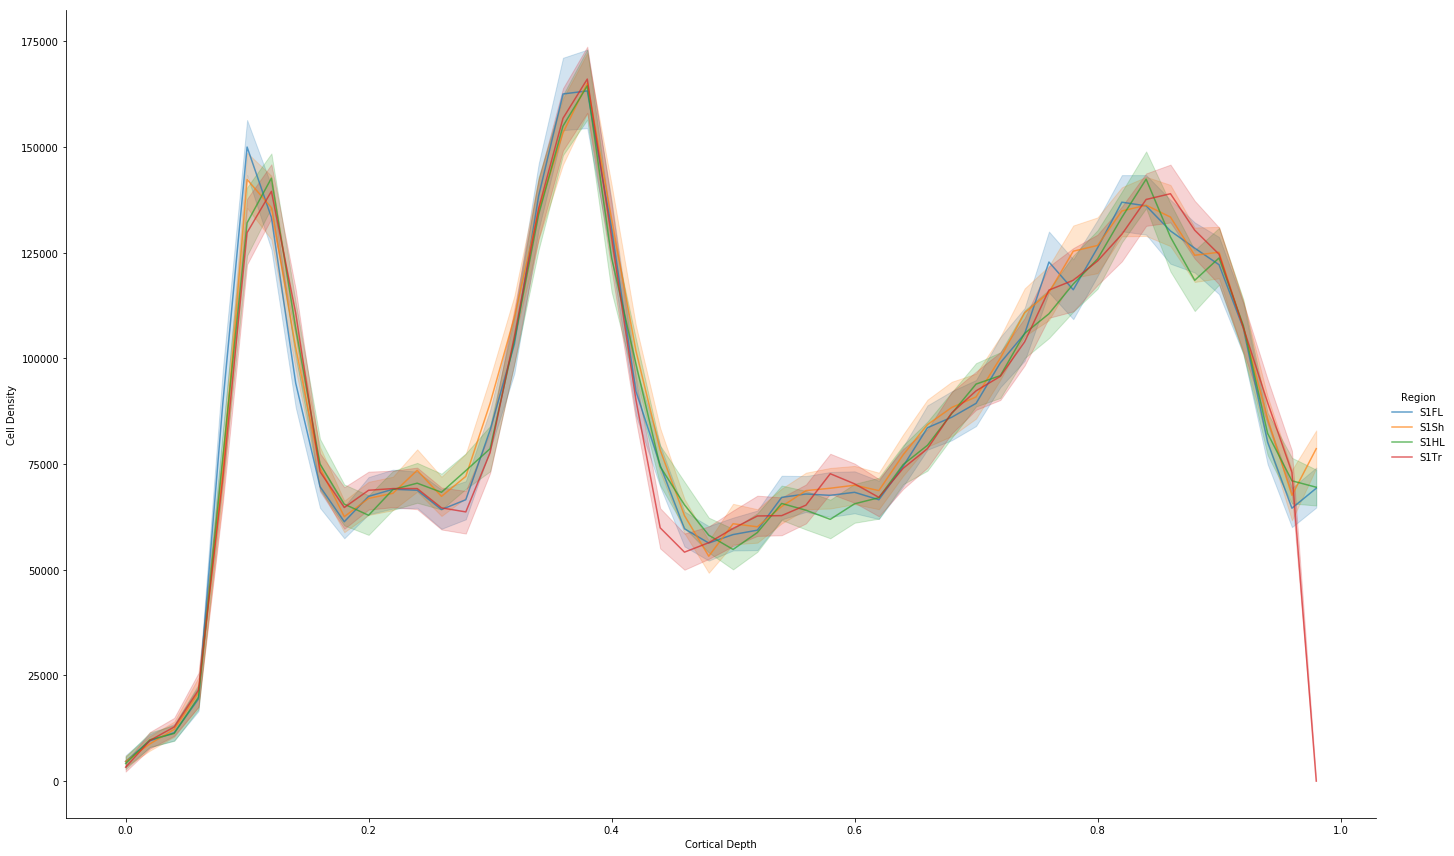

In [8]:
cell_density_report =\
    suite_composition_analyses\
        .analysis_cell_density_by_depth_using_sampling(
            circuit_bio_m,
            adapter)

In [7]:
cell_density_measurement["data"].sample(n=10)

cell_density
dataset               region (depth, begin) (depth, end)              
BlueBrainCircuitModel S1FL   0.72           0.74               96000.0
                             0.46           0.48               64000.0
                      S1HL   0.36           0.38              168000.0
                      S1FL   0.26           0.28              144000.0
                      S1Tr   0.20           0.22               88000.0
                      S1HL   0.64           0.66               56000.0
                      S1FL   0.66           0.68              104000.0
                      S1HL   0.32           0.34              104000.0
                      S1Sh   0.22           0.24               96000.0
                      S1HL   0.80           0.82              176000.0

In [ ]:
cell_density_by_mtype =\
    suite_composition_analyses\
        .measurement_mtype_cell_density_exhaustively(
            circuit_bio_m,
            adapter,
            depth={"begin": 100., "end": 150.})
cell_density_by_mtype.head()


In [ ]:
cell_density_by_morphology =\
    pd.Series(
        cell_density_by_mtype.values,
        index=pd.Index(
            [mtype.split('_')[-1] 
             for mtype in cell_density_by_mtype.index.values.to_list()],
            name="morphology"),
        name="cell_density")\
      .groupby("morphology")\
      .agg("sum")
print(cell_density_by_morphology.shape)
cell_density_by_morphology\
    .reindex([
       "BP", "BTC", "CHC", "DB", "LBC", "NBC", "MC", "SBC", "SSC"])\
    .fillna(0.)


In [ ]:
marker_density =\
    suite_composition_analyses\
        .measurement_marker_density_exhaustively(
            circuit_bio_m,
            adapter,
            depth={"begin": 100., "end": 150.})
marker_density

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/composition/__init__.py:623: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  for morphology in self.morphologies_interneurons])\


/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.0, 'end': 0.02}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (41242, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.02, 'end': 0.04}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py 

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.18, 'end': 0.2}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (28703, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.2, 'end': 0.22}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py L

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.36, 'end': 0.38}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (27034, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.38, 'end': 0.4}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py 

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.54, 'end': 0.56}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (24975, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.56, 'end': 0.58}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.72, 'end': 0.74}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (22629, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.74, 'end': 0.76}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.9, 'end': 0.92}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/model/__init__.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

            get_voxel_positions for voxel_ids of shape (23089, 3)
            

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/adapter/adapter.py Logger
DEBUGINFO@<2020-02-04 17:13:04>                                                 

                Compute visible voxel data for query
                	 {'depth': {'begin': 0.92, 'end': 0.9400000000000001}}.
                

/home/muchu/work/bbp/work/validations/dmt/v2/neuro_dmt/models/bluebrain/circuit/mode

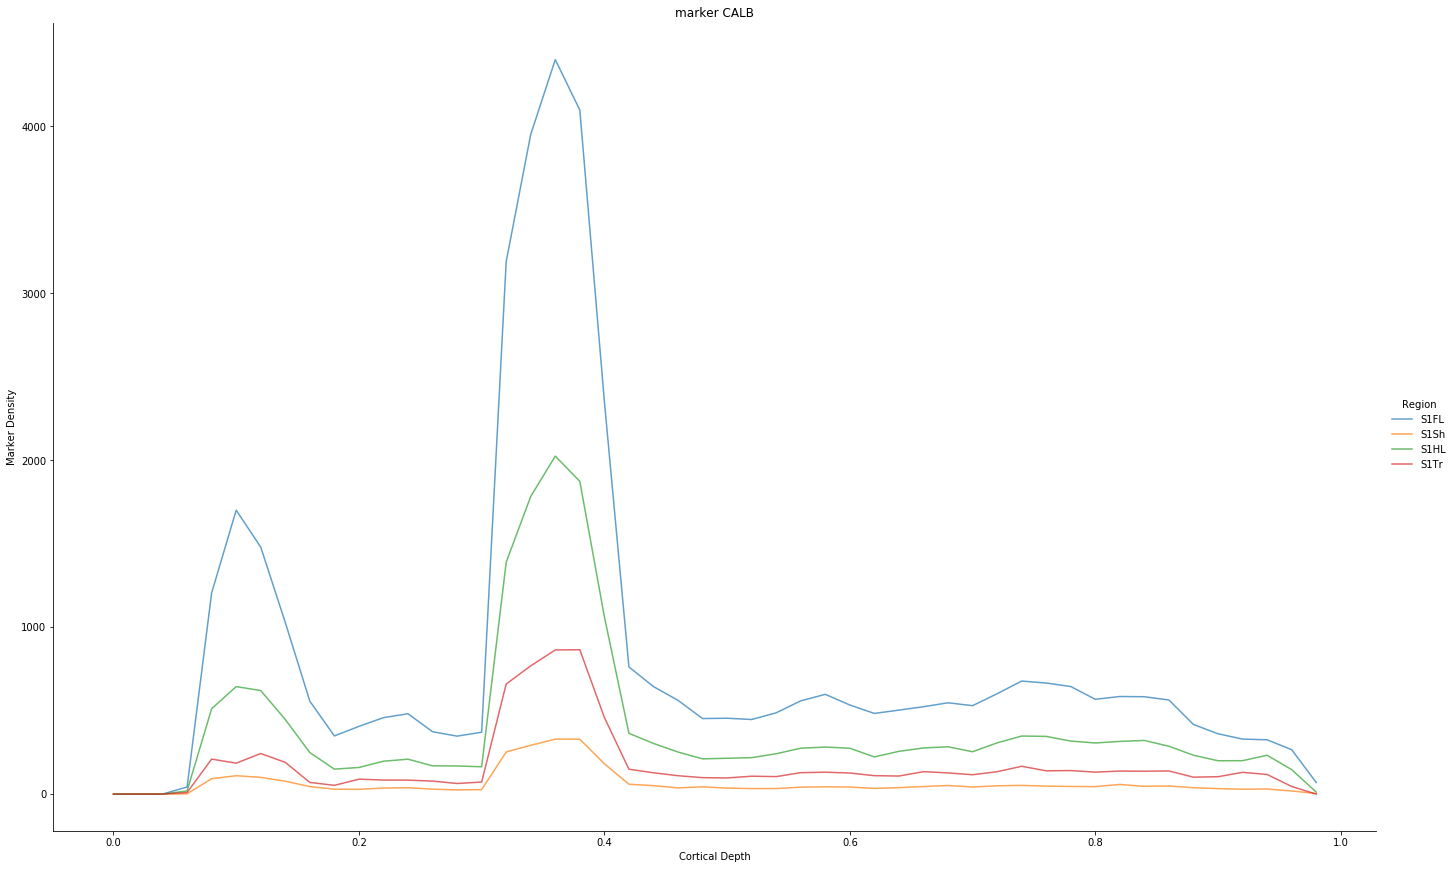

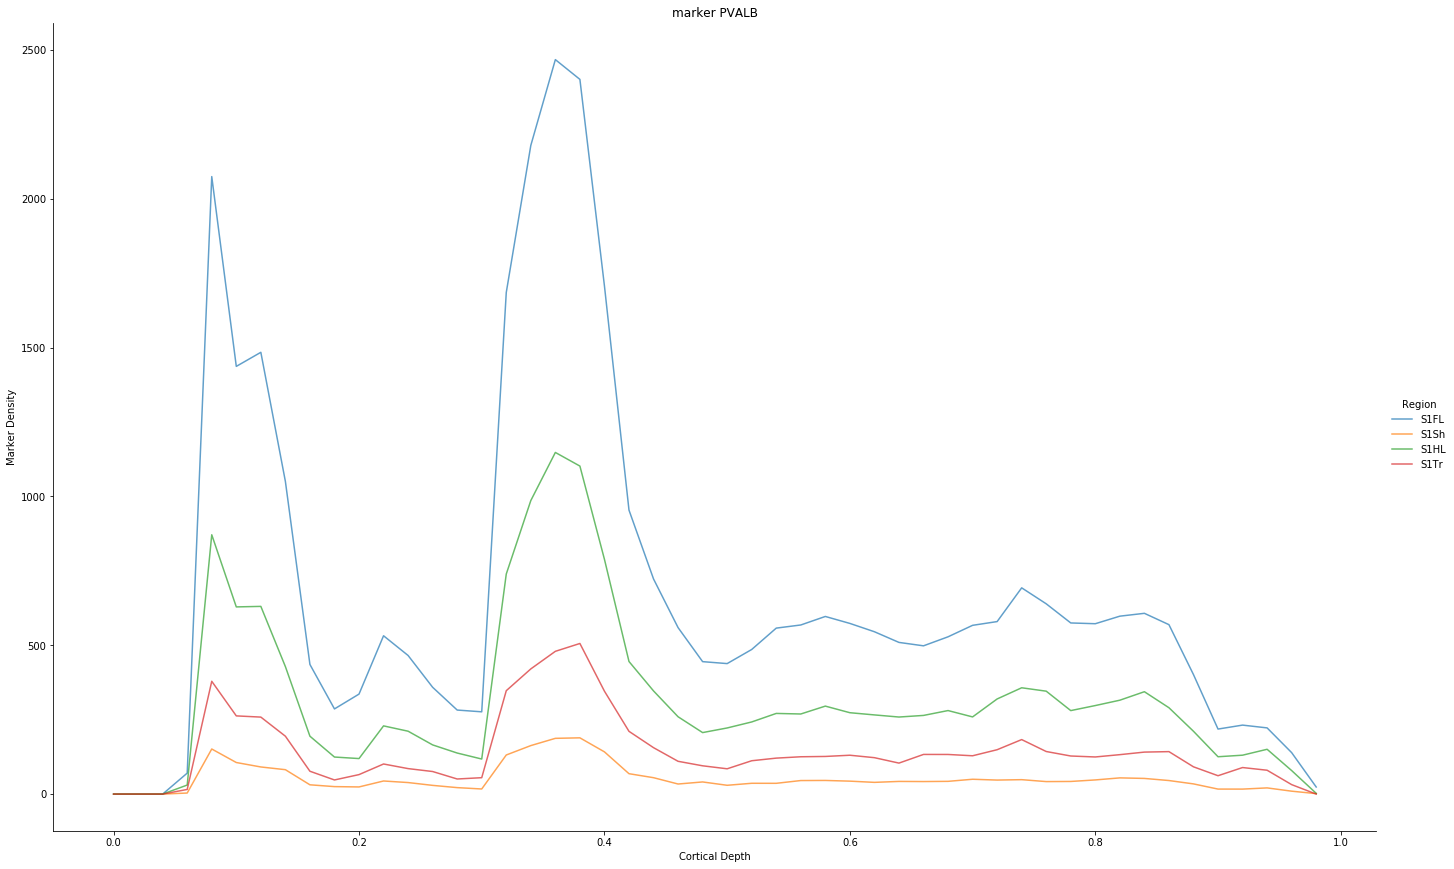

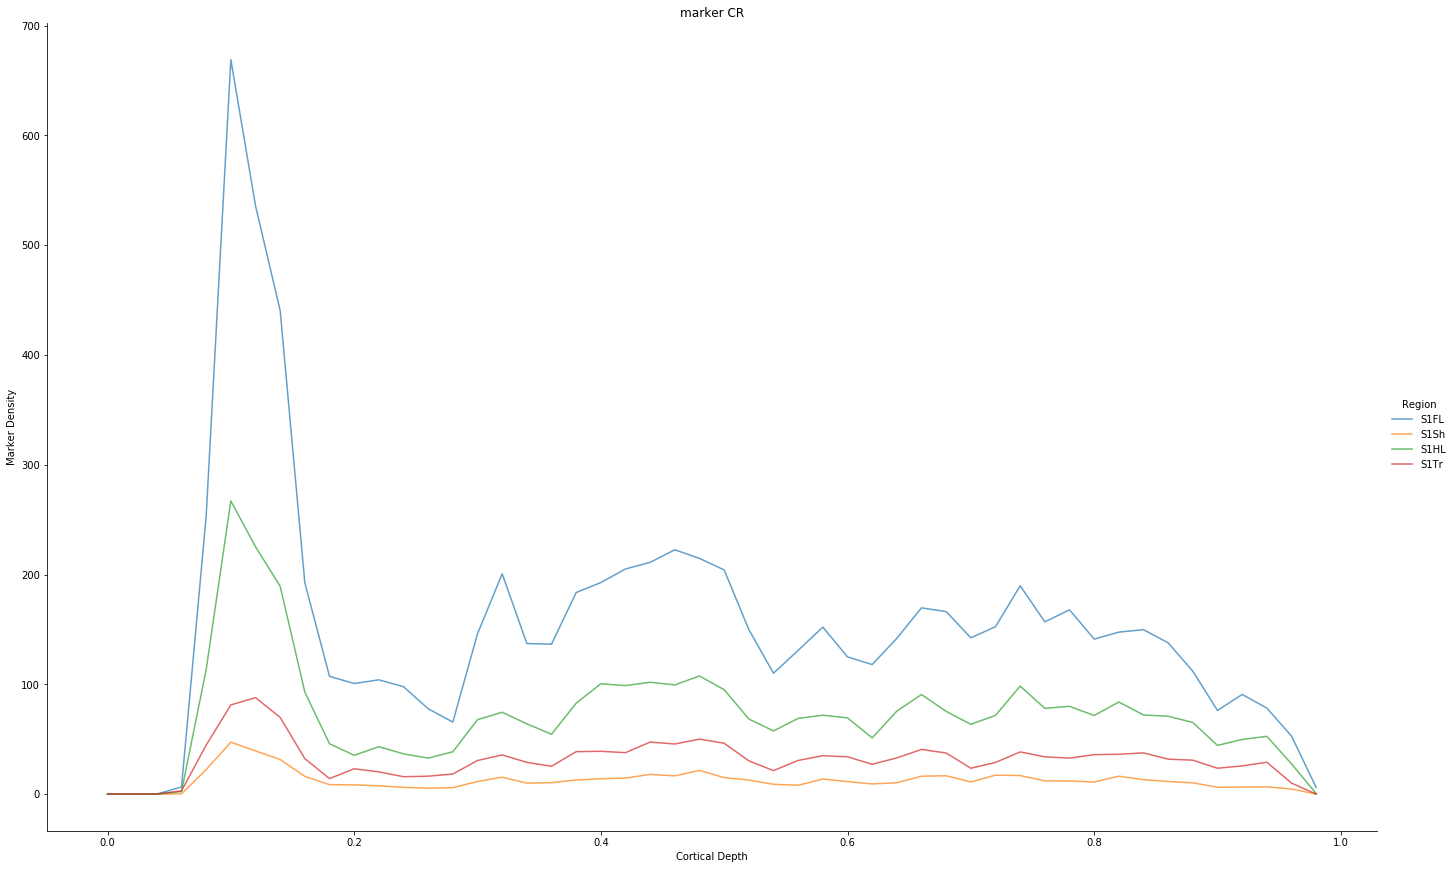

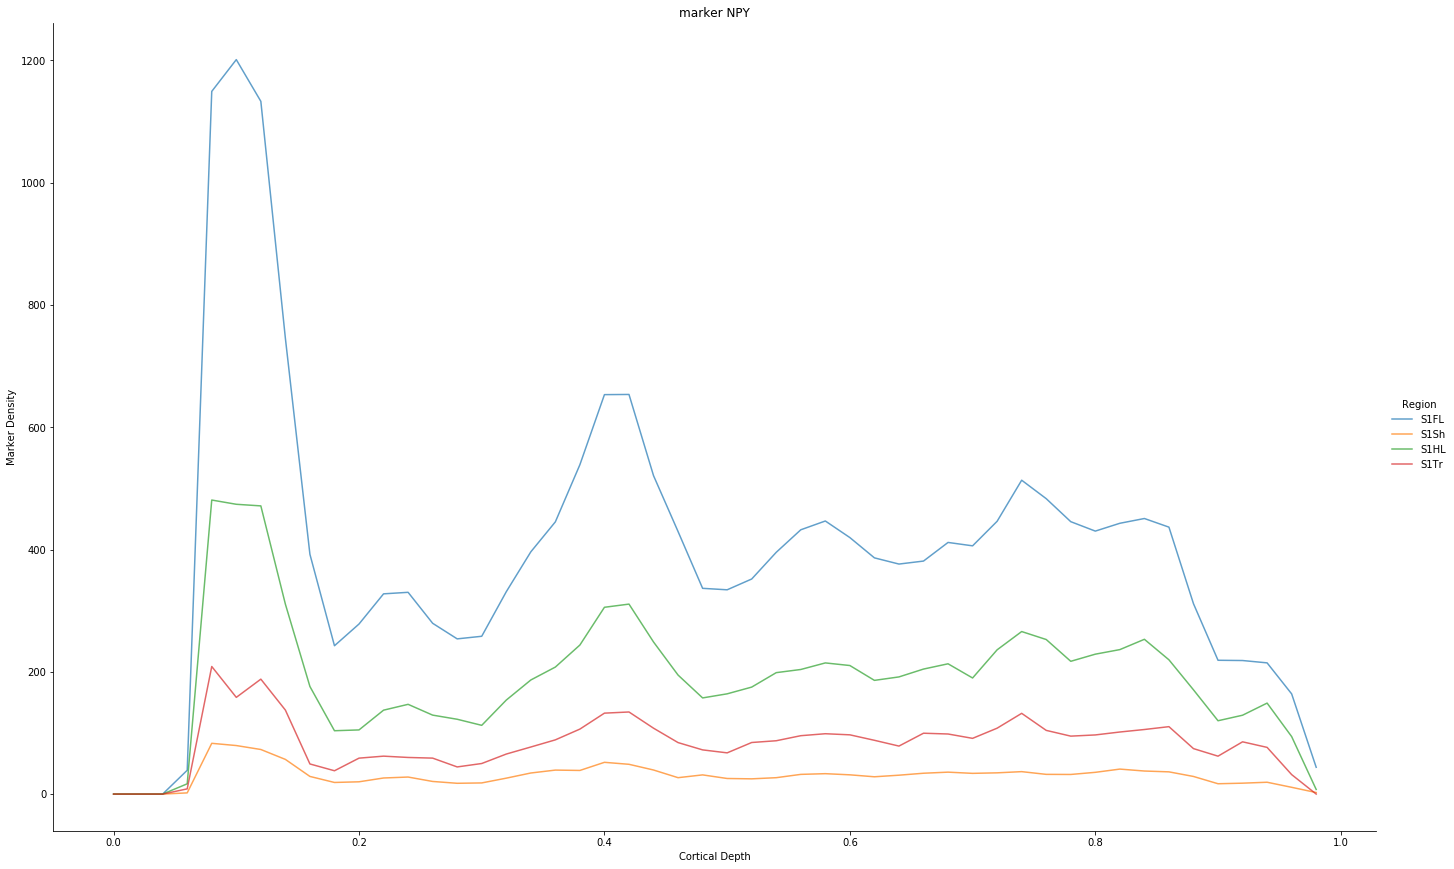

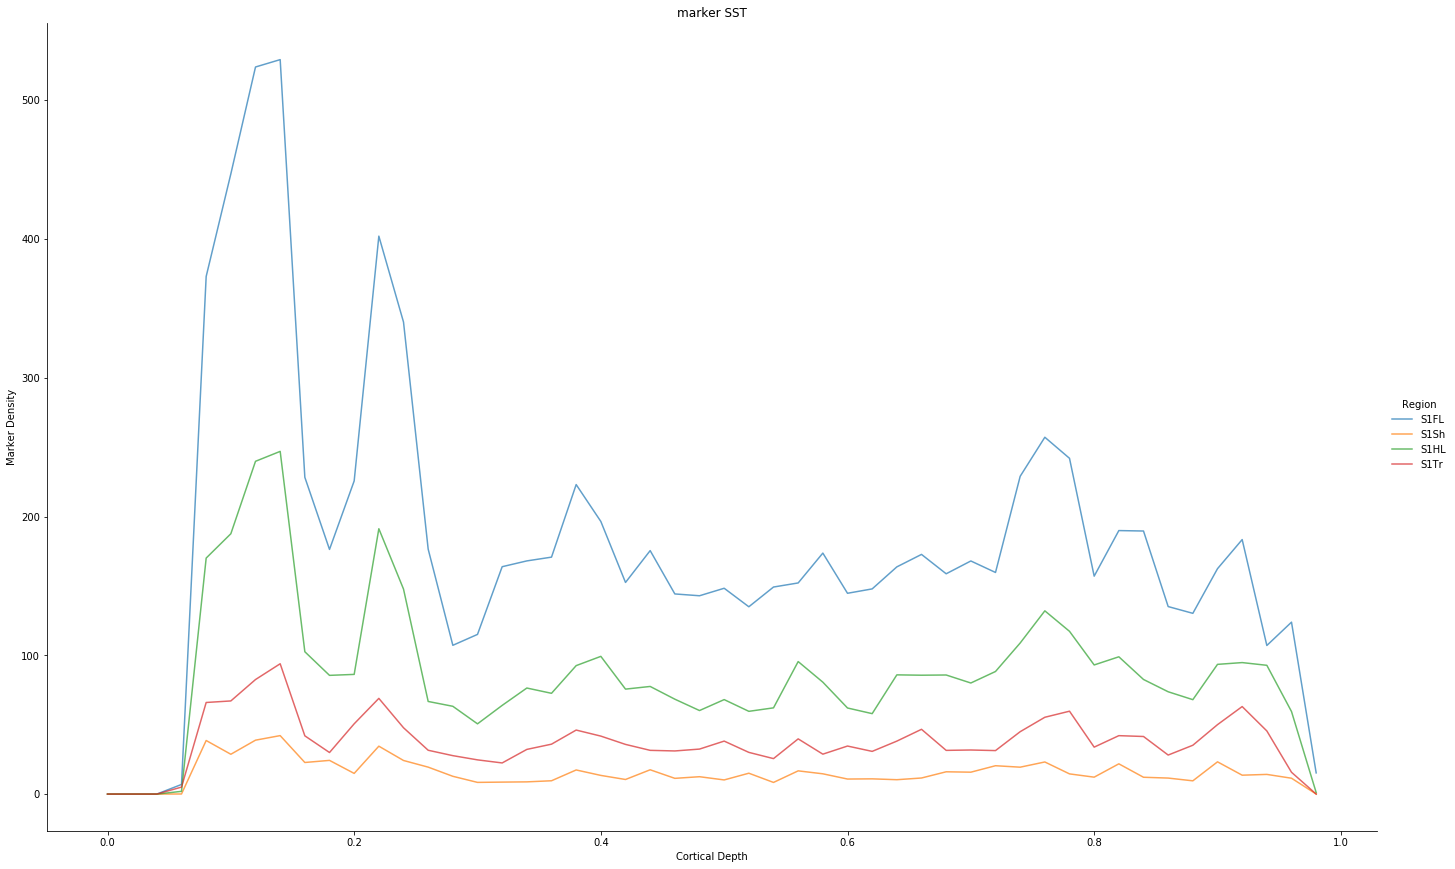

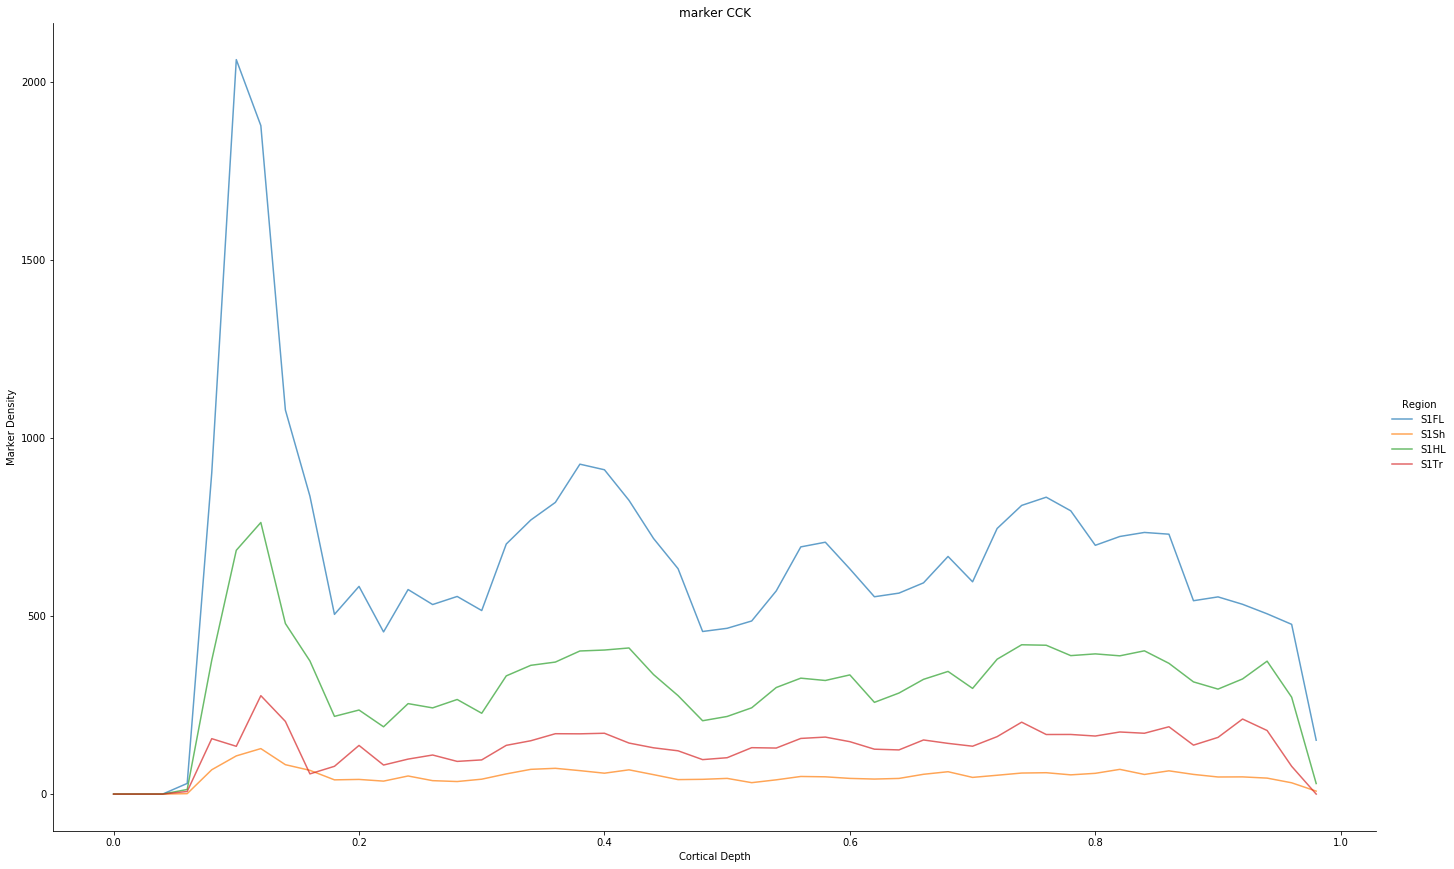

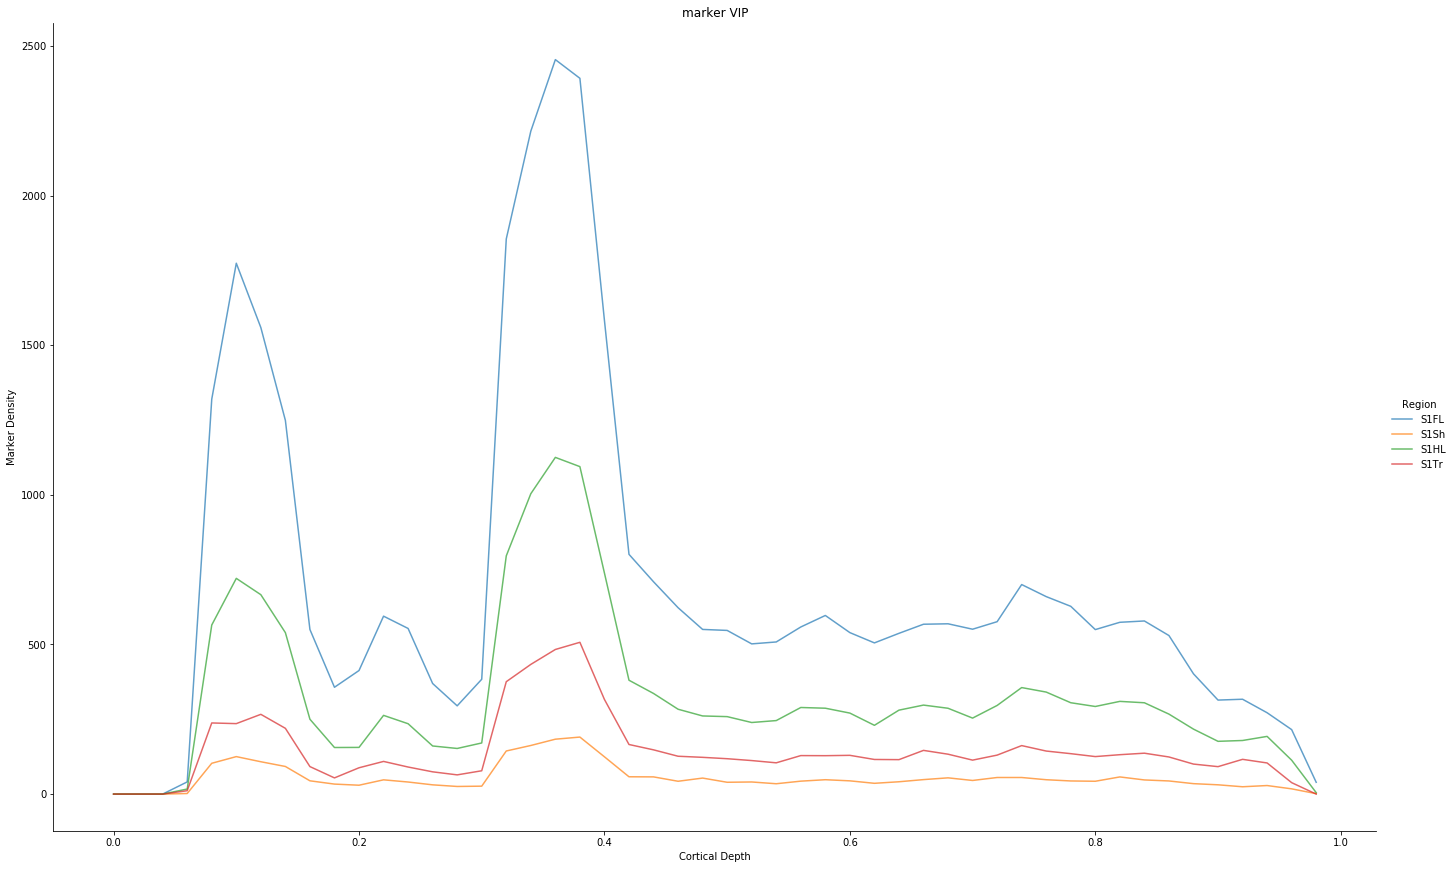

In [9]:
marker_density_report =\
    suite_composition_analyses\
        .analysis_marker_stains_by_depth_exhaustively(
            circuit_bio_m,
            adapter)

In [ ]:
com

In [ ]:
composition_analyses.measurement_mtype_cell_density_exhaustively(
    circuit_bio_m,
    adapter,
    layer="L1",
    region="S1HL")

In [ ]:
cell_counts =\
    cells.groupby(
        ["region", "layer", "mtype"]1
    ).agg(
        "size"
    )
cell_counts.xs(
    ("S1HL", 1),
    level=("region", "layer"))

In [ ]:
cell_counts.xs(
    ("S1FL", 2), level=("region", "layer")
)/cell_counts.xs(
    ("S1HL", 2), level=("region", "layer")
)

In [ ]:
cell_counts.xs(
    ("S1HL", 2), level=("region", "layer"))

In [ ]:
from neuro_dmt.analysis.reporting import CheetahReporter
from neuro_dmt import terminology

cd_rd =\
    composition_analysis.reference_data_cell_density(
                                adapter.get_brain_regions(circuit_bio_m))
cd_measurement =\
    composition_analysis\
        .analysis_cell_density_by_layer_using_sampling\
        .get_measurement(
            circuit_bio_m,
            adapter,
            reference_data=cd_rd,
            sampling_methodology=terminology.sampling_methodology.random,
            sample_size=2)
            
cd_report =\
    composition_analysis\
        .analysis_cell_density_by_layer_using_sampling\
        .get_report(
            cd_measurement,
            reference_data=cd_rd,
            figures={},
            **adapter.get_provenance(circuit_bio_m))


In [ ]:
from neuro_dmt import terminology
inh_fraction_report =\
    composition_analysis\
        .analysis_inihibitory_cell_fraction_by_layer_overall(
            circuit_bio_m,
            adapter,
            sampling_methodology=terminology.sampling_methodology.exhaustive)

In [ ]:
inh_fraction_report.measurement

In [ ]:
print(rat.defelipe2017.data.shape)
rat.defelipe2017.data.groupby("layer").agg(["size", "mean", "std"])

In [ ]:
defelipe_2017 =\
    data_plotting[
        data_plotting.dataset == "DeFelipe2017"]
print(defelipe_2017.shape[0])
defelipe_2017\
    .groupby("layer")\
    .agg(["mean", "std"])

In [ ]:
seaborn.barplot(
    x="layer",
    y="cell_density",
    hue="dataset",
    ci="sd",
    data=data_plotting[data_plotting.region == "S1HL"]
).set(
    xlabel="Layer",
    ylabel="Cell Density")

In [ ]:
seaborn.catplot(
    kind="bar",
    x="layer",
    y="cell_density",
    hue="dataset",
    ci="sd",
    data=data_plotting[data_plotting.region == "S1HL"]
)

In [ ]:
import seaborn
data =\
    cd_report.measurement\
        .groupby(["layer", "region"])\
        .agg(["mean", "std"])\
        .reset_index()
data.head()
seaborn.barplot(
    x="layer",
    y=("cell_density", "mean"),
    hue="region",
    data=data)

In [ ]:
overall_cd_m =\
    cell_density_analysis\
        .get_measurement(
            circuit_bio_m,
            adapter,
            sampling_methodology=terminology.sampling_methodology.exhaustive)

In [ ]:
overall_cd_m

In [ ]:
from neuro_dmt import terminology
overall_cd =\
    cell_density_analysis(
        circuit_bio_m,
        adapter,
        sampling_methodology=terminology.sampling_methodology.exhaustive)

In [ ]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import *
bars = Bars(
    xvar="layer",
    xlabel="Layer",
    yvar="cell_density",
    ylabel="Cell Density",
    gvar="dataset")

In [ ]:
cell_density_measurement =\
    cell_density_analysis\
        .get_measurement(
            circuit_bio_m,
            adapter)

In [ ]:
cell_density_analysis.get_figures(
    cell_density_analysis._with_reference_data(
        cell_density_measurement["data"]))

In [ ]:
cdard =\
    cell_density_analysis\
        ._with_reference_data(
            cell_density_measurement["data"])

In [ ]:
cdard["DeFelipe2014"]

In [ ]:
from dmt.data.observation import measurement
measurement.concat_as_samples(
    cell_density_analysis._with_reference_data(
        cell_density_measurement["data"]))

In [ ]:
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition\
    import *

cell_density_analysis =\
    BrainCircuitAnalysis(
        phenomenon=composition_analysis.phenomenon_cell_density,
        AdapterInterface=composition_analysis.AdapterInterface,
        reference_data=composition_analysis.sampled_reference_data(
            composition_analysis.reference_data_cell_density),
        measurement_parameters=composition_analysis.parameters_regions_and_layers,
        sample_measurement=composition_analysis.sample_measurement_cell_density,
        plotter=MultiPlot(
            mvar="region",
            plotter=Bars(
                xvar="layer",
                xlabel="Layer",
                yvar="cell_density",
                ylabel="Cell Density",
                gvar="dataset")),
        report=CircuitAnalysisReport)

In [ ]:
cell_density_analysis(circuit_bio_m, adapter)

In [ ]:
parameter_values =\
    cell_density_analysis\
        .measurement_parameters


In [ ]:
parameter_values

In [ ]:
class Test:
    def __init__(self,value):
        if not isinstance(value, Test):
            self.value = value
        else:
            self.value = value.value
            

In [ ]:
test = Test(10)
test_2 = Test(test)

In [ ]:
test_2 == test

In [ ]:
import pandas as pd
from dmt.tk.parameters import Parameters

regions = ["S1HL", "S1FL"]
layers = range(1,7)
regions_and_layers =\
    pd.DataFrame({
        "region": [r for r in regions for _ in layers],
        "layer": [l for _ in regions for l in layers]})
p0 = Parameters(regions_and_layers)
p1 = Parameters(p0)

In [ ]:
p1.values

In [ ]:
(43345060) ** (1./3.)

In [ ]:
regions_and_layers =\
    composition_analysis\
        .parameters_regions_and_layers

In [ ]:
regions_and_layers._resolve_values(adapter, circuit_bio_m)